In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datathon-fall-2024-by-diu-cpc/sample submission.csv
/kaggle/input/datathon-fall-2024-by-diu-cpc/Train.csv
/kaggle/input/datathon-fall-2024-by-diu-cpc/Test.csv


In [7]:
train = pd.read_csv("/kaggle/input/datathon-fall-2024-by-diu-cpc/Train.csv")
test = pd.read_csv("/kaggle/input/datathon-fall-2024-by-diu-cpc/Train.csv")

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split, GridSearchCV

In [12]:
test.rename(columns={'ID': 'Id'}, inplace=True)


In [16]:

test_df = test.copy()
df3_cleaned = train.copy()
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
encoder = LabelEncoder()
df_encoded = df3_cleaned.copy()
test_df_encoded = test_df2.copy()

# Iterate over each column in the DataFrame, excluding 'id'
for col in df_encoded.select_dtypes(include=['object']).columns:
    encoder.fit(df_encoded[col])
    df_encoded[col] = encoder.transform(df_encoded[col])

for col in test_df_encoded.select_dtypes(include=['object']).columns:
  if col != 'ID':  # Exclude the 'id' column
    encoder.fit(test_df_encoded[col])
    test_df_encoded[col] = encoder.transform(test_df_encoded[col])

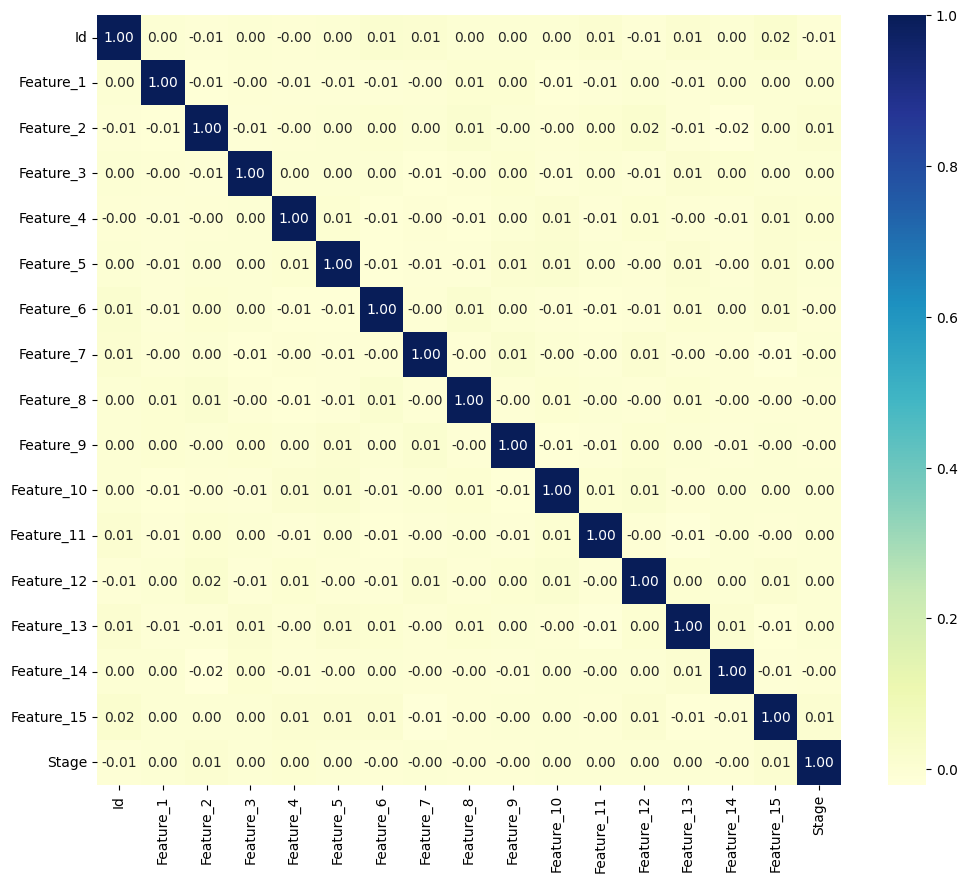

In [17]:
corr = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.savefig('/kaggle/working/final_heatmap.jpg')  # Save in the working directory
plt.show() 

In [18]:
df_final = df_encoded.copy()
test_final = test_df_encoded.copy()

In [19]:
df_final.drop(columns=['Feature_1','Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_12', 'Feature_7',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14'], inplace=True, axis=1)
test_final.drop(columns=['Feature_1','Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_12', 'Feature_7',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14'], inplace=True, axis=1)

In [20]:
df_final.head()

,Id,Feature_2,Feature_15,Stage
0,0,13086,1,1
1,1,20010,1,0
2,2,6851,0,2
3,3,4539,0,1
4,4,2,2,1


In [21]:
X = df_final.drop(['Stage'], axis=1)
y = df_final['Stage']
X_test = test_final.copy()

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, stratify=y, random_state=21)

In [23]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [25]:
from sklearn.metrics import classification_report
# Generate and print the classification report
y_pred3 = svc.predict(X_valid)
report = classification_report(y_valid, y_pred3)
print("Classification Report for SVC:\n")
print(report)

Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       459
           1       0.71      1.00      0.83      3473
           2       0.00      0.00      0.00       988

    accuracy                           0.71      4920
   macro avg       0.24      0.33      0.28      4920
weighted avg       0.50      0.71      0.58      4920



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
y_pred = svc.predict(X_test)
submission_svc = pd.DataFrame({
    'ID': test_df2['Id'],
    'Stage': y_pred
})
submission_svc.to_csv('/content/drive/MyDrive/Datathon/submission_rfc.csv',index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Stage
